# Demo Scenario 1
> Validate Demonstrate Scenario 1 on a notebook

The goal of this demo is to demonstrate the utilities to dynamically import new tools via GPT Function calling, as well as incorporating some of our built-in tools in a relevant use case. 

The scenario in this demo is a user wanting to retrieve information about traffic information. Without our application, the user needs to access an online service (e.g., Road DigiTraffic) about traffic information, navigate through the website UI, and making requests to the service with appropriate commands / UI navigation. However, the problem in this manual approach is that it can be time-consuming, prone to user error, and inefficient, especially if the user is unfamiliar with the website’s interface or the specific commands required. It is also difficult for the user to combine the information with other utilities.

Our application can resolve these issues by dynamically importing API endpoints as tools for GPT FC. API endpoints are the backbone of an online service, so directly importing them as tools mean that GPT FC can operate all utilities available to the user. With this setup, GPT FC can interpret the user’s chat instructions, automatically operate the appropriate functions, and provide accurate, real-time traffic data efficiently. This simplifies the process of navigating through the utilities of a service and ensures that users can easily combine the information with other tools or workflows.

In [ ]:
#| hide
from nbdev.showdoc import *

## Step 1 - Preparation

For this demo, to fully demonstrate the dynamic imports via GPT FC, we will import only functions from `llmcam.utils.store` as built-in GPT FC tools. This function will be responsible for dynamically importing any tools that we use subsequently.

At this step, the main tasks are:

- Import `llmcam.core` modules and `llmcam.utils.store` module.  
- Set up initial `tools` list and its handler as instructed in `utils/01_store.ipynb` notebook.  
- Verify set up with GPT messages.  

In [ ]:
#| eval: false
# Import all the necessary modules
from llmcam.core.fc import *
from llmcam.core.fn_to_schema import *
from llmcam.utils.store import *

In [ ]:
#| eval: false
# Set up `tools` list and `execute_handler` function
tools = []
def execute_handler(function_name, **kwargs):
    execute_handler_core(tools, function_name, **kwargs)

# Add default tools from `llmcam.utils.store` built-in functions
tools.extend([handler_schema(function, service_name="toolbox_handler", fixup=execute_handler) for function in [
    add_api_tools,
    add_function_tools,
    remove_tools
]])

In [ ]:
#| eval: false
# Start the conversation and verify the tools
messages = form_msgs([
    ("system", "You are a helpful system administrator. Use the supplied tools to help the user."),
    ("user", "What tools can you use?")
])
complete(messages, tools=tools)
print_msg(messages[-1])

>> Assistant:
I can add, remove, and manage tools related to API services and function tools within the
`functions` namespace. I also have a capability to execute multiple tool operations in parallel
using the `multi_tool_use.parallel` function. If you need a specific API or functionality, let me
know, and I can manage the tools accordingly.


The GPT agent should list all the 3 built-in tools from `llmcam.utils.store`.

## Step 2 - Integrate Road DigiTraffic

At this step, we will integrate Road DigiTraffic via its base API service and OpenAPI Specification file. This service is public and users can retrieve traffic information by accessing its API endpoints with HTTPS requests. The official documentation is available at: https://www.digitraffic.fi/tieliikenne/. The base URL for making requests is https://tie.digitraffic.fi, while its OAS file is downloadable from the URL https://tie.digitraffic.fi/swagger/openapi.json.

As such, this service provides all information we need for incorporating it to GPT FC via `llmcam.utils.store`. It is also without the use of tokens or security schemes that our service is currently not accounting for. In this demo, we can use it to retrieve information about weather cameras and thereby incorporate further with our vision modules.

The main tasks for integrating Road DigiTraffic include:

- Add Road DigiTraffic with necessary information.  
- Check for available tools.  
- Make a request about weather camera stations.  
- (Optional) Prune tool call results as response from Road DigiTraffic can exceed maximum tokens.

In [ ]:
#| eval: false
# Add a new API service called 'road_digitraffic' with necessary details
messages.append(form_msg(
    "user", 
    "Add a new API service called 'road_digitraffic'. \
Use the base URL 'https://tie.digitraffic.fi', \
and the OpenAPI Specification URL 'https://tie.digitraffic.fi/swagger/openapi.json'."
))
complete(messages, tools=tools)
print_msg(messages[-1])

>> Assistant:
The new API service 'road_digitraffic' has been successfully added with the base URL
'https://tie.digitraffic.fi' and the OpenAPI Specification URL
'https://tie.digitraffic.fi/swagger/openapi.json'.


In [ ]:
#| eval: false
# Verify the added API service
messages.append(form_msg("user", "What tools can you use?"))
complete(messages, tools=tools)
print_msg(messages[-1])

>> Assistant:
I now have access to the following tools within the `functions` namespace:  1. **Road Digitraffic
API Tools** (from the recently added 'road_digitraffic' service):    - Access various endpoints
related to traffic measurement, weather stations, maintenance tracking, and more.  2. **Multi Tool
Execution**:    - `multi_tool_use.parallel`: Execute multiple tools in parallel when they can
operate independently.  If you need specific functionalities or data, feel free to ask, and I can
use the appropriate tool.


In [ ]:
#| eval: false
# Make a request to the 'road_digitraffic' API service to get the traffic information
messages.append(form_msg("user", "Can you tell me where exists traffic jam right now?"))
complete(messages, tools=tools)
print_msg(messages[-1])

>> Assistant:
There is a traffic situation report for a traffic jam right now:  - **Location:** Road 6,
Lappeenranta, Finland - **Nature of Incident:** Preliminary accident report - **Specific Location:**
Between Laihian junction bridge and Muuko interchange - **Coordinates:** Path through multiple
points from [28.315513, 61.073364] to [28.348438, 61.084576] - **Start Time:** December 19, 2024,
23:08:00 UTC - **Expected End Time:** December 19, 2024, 23:38:14 UTC - **Additional Information:**
[Traffic Information and Road Conditions Online](https://liikennetilanne.fintraffic.fi/) -
**Contact:** Fintraffic Tieliikennekeskus Tampere, Phone: 02002100, Email:
tampere.liikennekeskus@fintraffic.fi  If you need more detailed information about other locations or
traffic situations, let me know!


In [ ]:
#| eval: false
messages = [ message for message in messages if message["role"] != "tool" and message["content"] != None ]


## Step 3 - Integrate `llmcam.vision` modules

We can combine the information about weather camera stations with our existing functions to capture images from weather cameras and detect objects in images. To demonstrate further the utilities from `llmcam.utils.store`, we can try dynamically importing this built-in functions with GPT FC.

In this step, the main tasks include:

- Add necessary tools with full module source and function names `llmcam.vision.dtcam.cap` and `llmcam.vision.yolo.detect_objects`.  
- Make command to capture image from a specified weather camera and detect objects from it.  

In [ ]:
#| eval: false
# Add the functions `llmcam.vision.dtcam.cap` and `llmcam.vision.yolo.detect_objects` to the new service 'vision'
messages.append(form_msg(
    "user", 
    "Add a new service called `vision` with the functions `llmcam.vision.dtcam.cap` and \
`llmcam.vision.yolo.detect_objects`."))
complete(messages, tools=tools)
print_msg(messages[-1])

>> Assistant:
The new service 'vision' has been added with the functions `llmcam.vision.dtcam.cap` and
`llmcam.vision.yolo.detect_objects`. If you need to utilize these functions, feel free to ask!


In [ ]:
#| eval: false
# Use the functions to show an image with a weather camera and detect objects in it
messages.append(form_msg(
    "user", 
    "Show me an image in Lappeenranta with a weather camera \
and detect objects in it."))
complete(messages, tools=tools)
print_msg(messages[-1])


image 1/1 /home/nghivo/tinyMLaaS/llmcam/data/cap_2024.12.19_23:26:51_Imatralle_C0352901.jpg: 384x640 (no detections), 47.9ms
Speed: 6.6ms preprocess, 47.9ms inference, 51.8ms postprocess per image at shape (1, 3, 384, 640)
>> Assistant:
Here is an image captured from a weather camera in Lappeenranta:  ![Lappeenranta Weather
Camera](sandbox:/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.12.19_23:26:51_Imatralle_C0352901.jpg)
Unfortunately, no objects were detected in this image. If you have any other requests or need
additional information, feel free to ask!


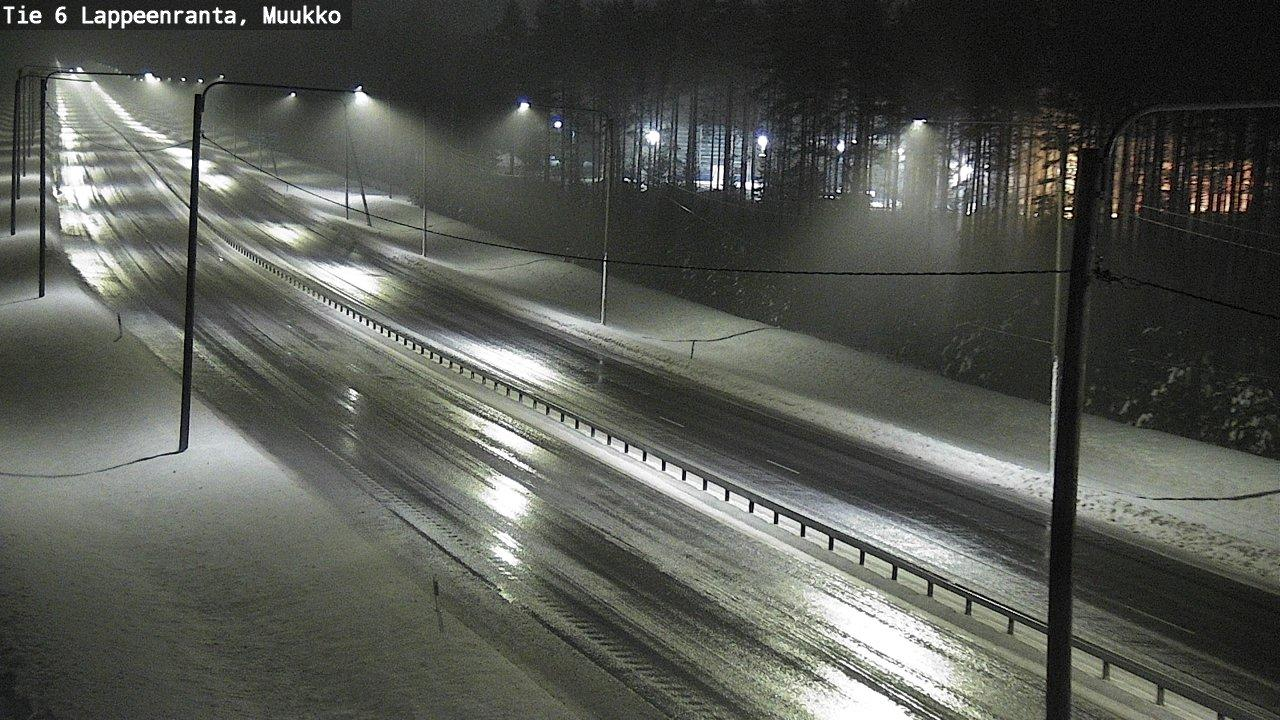

In [ ]:
#| eval: false
# Display the downloaded image
from IPython.display import Image
Image("/home/nghivo/tinyMLaaS/llmcam/data/cap_2024.12.19_23:26:51_Imatralle_C0352901.jpg")

## **CONVERSATION TRANSCRIPT**

In [ ]:
#| eval: false
print_msgs(messages)

>> System:
You are a helpful system administrator. Use the supplied tools to help the user.
>> User:
What tools can you use?
>> Assistant:
I can add, remove, and manage tools related to API services and function tools within the
`functions` namespace. I also have a capability to execute multiple tool operations in parallel
using the `multi_tool_use.parallel` function. If you need a specific API or functionality, let me
know, and I can manage the tools accordingly.
>> User:
Add a new API service called 'road_digitraffic'. Use the base URL 'https://tie.digitraffic.fi', and
the OpenAPI Specification URL 'https://tie.digitraffic.fi/swagger/openapi.json'.
>> Assistant:
The new API service 'road_digitraffic' has been successfully added with the base URL
'https://tie.digitraffic.fi' and the OpenAPI Specification URL
'https://tie.digitraffic.fi/swagger/openapi.json'.
>> User:
What tools can you use?
>> Assistant:
I now have access to the following tools within the `functions` namespace:  1. **